In [1]:
import json
from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt
%matplotlib widget

In [2]:
with open('../gnn4rcpsp/experiments/hindsight_vs_reactive_markov_deadline_20221121181844.json', 'r') as jsonfile:
    results = json.load(jsonfile)

In [3]:
algstats = defaultdict(lambda: defaultdict(lambda: []))

for benchmark, scenarios in results.items():
    for scenario, algorithms in scenarios.items():
        for algorithm, statistics in algorithms.items():
            if statistics['executed'] != 'Fail':
                algstats[algorithm]['executed'].append(statistics['executed'])
                algstats[algorithm]['timing'].append(statistics['timing'])
                if statistics['deadline'] != "None":
                    algstats[algorithm]['deadline'].append(int(statistics['executed'] <= statistics['deadline']))

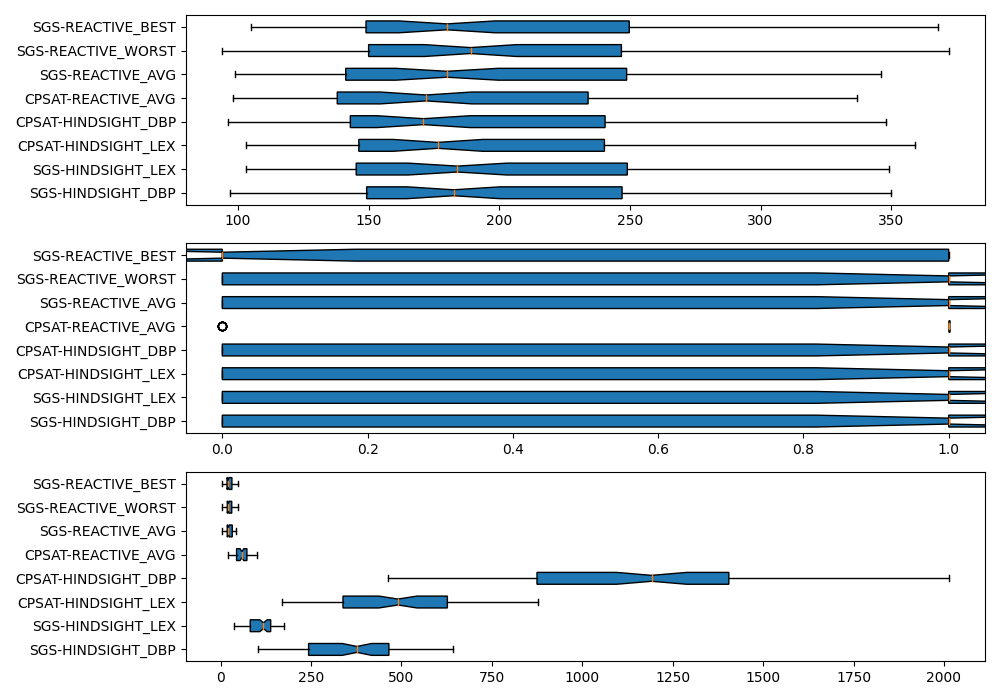

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize =(10, 7))
ax1.boxplot([algstats[alg]['executed'] for alg in algstats], notch=True, patch_artist=True, vert=False)
ax2.boxplot([algstats[alg]['deadline'] for alg in algstats], notch=True, patch_artist=True, vert=False)
ax3.boxplot([algstats[alg]['timing'] for alg in algstats], notch=True, patch_artist=True, vert=False)
for ax in [ax1, ax2, ax3]:
    ax.set_yticks(np.arange(1, len(algstats)+1))
    ax.set_yticklabels([alg for alg in algstats])
plt.tight_layout()
plt.show()

In [5]:
for alg in algstats:
    print(f"Deadline prob of {alg}: {np.mean(algstats[alg]['deadline'])}")

Deadline prob of SGS-HINDSIGHT_DBP: 0.6351351351351351
Deadline prob of SGS-HINDSIGHT_LEX: 0.5675675675675675
Deadline prob of CPSAT-HINDSIGHT_LEX: 0.6756756756756757
Deadline prob of CPSAT-HINDSIGHT_DBP: 0.7162162162162162
Deadline prob of CPSAT-REACTIVE_AVG: 0.8783783783783784
Deadline prob of SGS-REACTIVE_AVG: 0.6621621621621622
Deadline prob of SGS-REACTIVE_WORST: 0.5135135135135135
Deadline prob of SGS-REACTIVE_BEST: 0.44594594594594594
